In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
my_binary_1_img = cv2.imread("./binary_1.png",0)

In [5]:
print(type(my_binary_1_img))

<class 'numpy.ndarray'>


In [6]:
# Morfolojik İşlemler: Gri seviyede (tek kanallı) görüntülerin yapısal
# özelliklerinin değiştirilmesi için kullanılan klasik görüntü işleme yöntemidir
# Bu yöntemin 5 temel elementi vardır. Bunlar:
# Erosion (Aşınma), Dilation (Genişleme), Opening (Açılma), Closing (Kapanma)
# Gradient (Gradyan-piksel yoğunluğu hesaplama)

In [7]:
# Morfolojik İşlemler-1: Erosion (Aşınma), elimizdeki bir kernel (çekirdek
# matrisi) sayesinde, görüntüdeki beyaz renkleri aşındırmaya-küçültmeye yarar
# Bu işlemi yaparken çekirdek matrisi ile görüntü arasında AND mantıksal
# işlemi gerçekleşir. Bu sayede, sadece matristeki 1 değeri ile görüntüdeki
# 255 ya da 1 değeri eşleştiğinde beyaz renk sabit kalır, diğer seçeneklerde
# renk, siyah olur. Böylelikle, beyaz renkler aşınmış-erozyona uğramış olur

# işlemi yapacağımız ve içi 1 değeriyle dolu olan matrisimizi oluşturuyoruz
my_kernel = np.ones((5,5),dtype=np.uint8)

In [8]:
my_erosion_img = cv2.erode(my_binary_1_img, my_kernel, iterations=6)

Text(0.5, 1.0, 'Erosion Image')

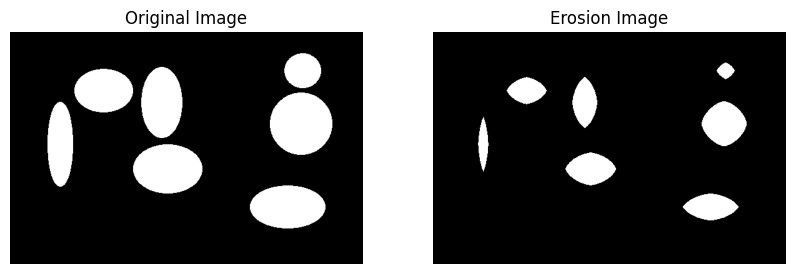

In [9]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(my_binary_1_img,cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(my_erosion_img,cmap="gray")
plt.axis("off")
plt.title("Erosion Image")

In [10]:
my_dilation_img = cv2.dilate(my_binary_1_img, my_kernel, iterations=6)

Text(0.5, 1.0, 'Dilation Image')

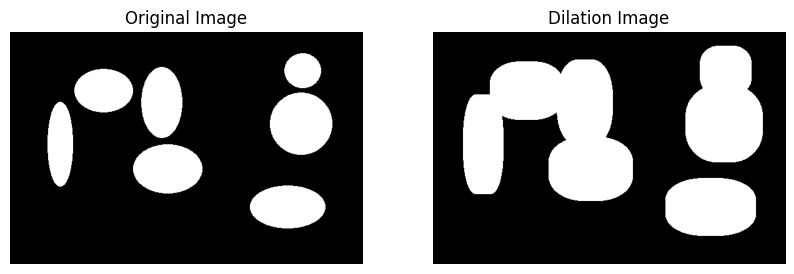

In [11]:
fig = plt.figure(figsize=(10,7))

#plt.subplot(satır_sayısı,sütun_sayısı,o_anki_görüntünün_hücresi)
#plt.subplot(2,3,5) = 2. satırın 3. sütunun 5. görüntüsü
# max gösterilecek görüntü sayısı = satır * sütun

plt.subplot(1,2,1)
plt.imshow(my_binary_1_img,cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(my_dilation_img,cmap="gray")
plt.axis("off")
plt.title("Dilation Image")

In [12]:
new_img = cv2.imread("./binary_2.png",0)

In [13]:
print(type(new_img))

<class 'numpy.ndarray'>


In [14]:
new_img.shape

(372, 565)

In [15]:
# beyaz renkli bir gürültü oluşturuyoruz
# Gürültü (noise), seslerde istenmeyen frekans, görüntülerde istenmeyen
# piksel demektir.

my_white_noise = np.random.randint(0,2,size=new_img.shape[:2])
my_white_noise *= 255

Text(0.5, 1.0, 'White Noise')

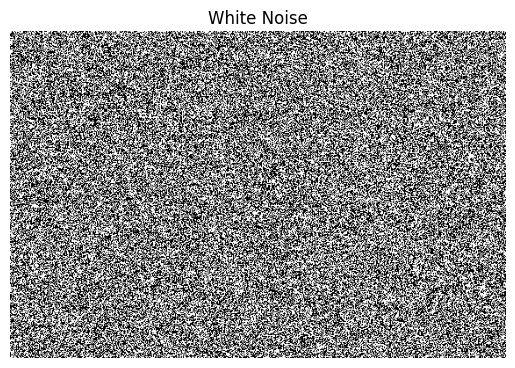

In [16]:
plt.imshow(my_white_noise,cmap="gray")
plt.axis("off")
plt.title("White Noise")

In [17]:
my_noised_img_1 = my_white_noise + new_img

Text(0.5, 1.0, 'Noised Image')

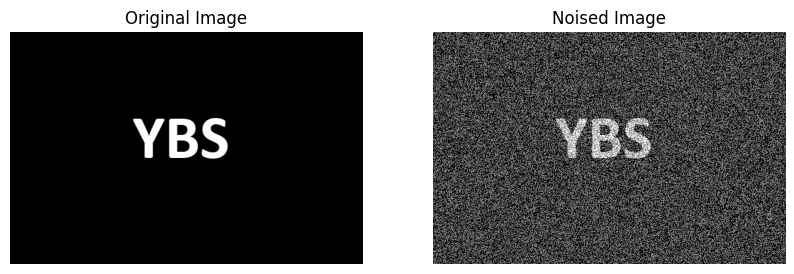

In [18]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(new_img,cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(my_noised_img_1,cmap="gray")
plt.axis("off")
plt.title("Noised Image")

In [19]:
my_opening_img = cv2.morphologyEx(my_noised_img_1.astype(np.float32),
                            cv2.MORPH_OPEN, my_kernel)

Text(0.5, 1.0, 'Opening Image')

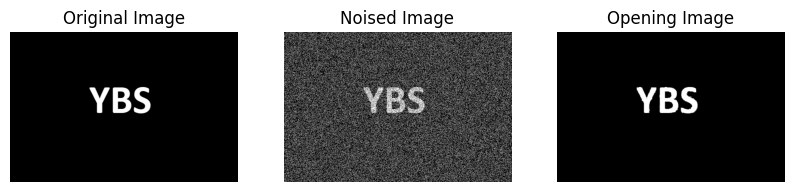

In [20]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(new_img,cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(my_noised_img_1,cmap="gray")
plt.axis("off")
plt.title("Noised Image")

plt.subplot(1,3,3)
plt.imshow(my_opening_img,cmap="gray")
plt.axis("off")
plt.title("Opening Image")

In [21]:
# Siyah gürültü oluşturma

my_black_noise = np.random.randint(0,2,size=new_img.shape[:2])
my_black_noise *= -255

In [22]:
my_noised_img_2 = my_black_noise + new_img

In [23]:
my_noised_img_2[my_noised_img_2<=-245] = 0

Text(0.5, 1.0, 'Black Noise')

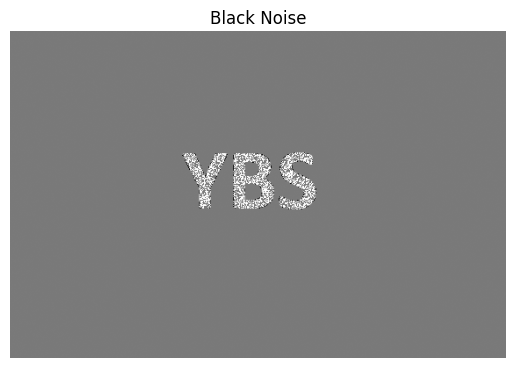

In [24]:
plt.imshow(my_noised_img_2,cmap="gray")
plt.axis("off")
plt.title("Black Noise")

In [25]:
my_closing_img = cv2.morphologyEx(my_noised_img_2.astype(np.float32),
                            cv2.MORPH_CLOSE, my_kernel)

Text(0.5, 1.0, 'Closing Image')

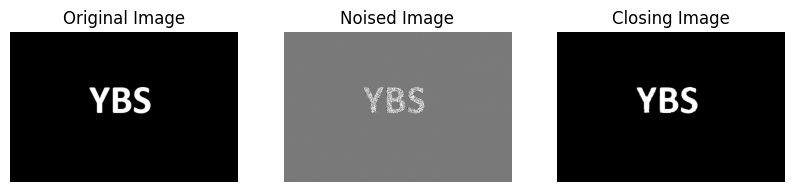

In [26]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(new_img,cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(my_noised_img_2,cmap="gray")
plt.axis("off")
plt.title("Noised Image")

plt.subplot(1,3,3)
plt.imshow(my_closing_img,cmap="gray")
plt.axis("off")
plt.title("Closing Image")

In [27]:
my_gradient_1 = cv2.morphologyEx(my_binary_1_img, cv2.MORPH_GRADIENT, my_kernel)
my_gradient_2 = cv2.morphologyEx(new_img, cv2.MORPH_GRADIENT, my_kernel)

Text(0.5, 1.0, 'Gradient-2 Image')

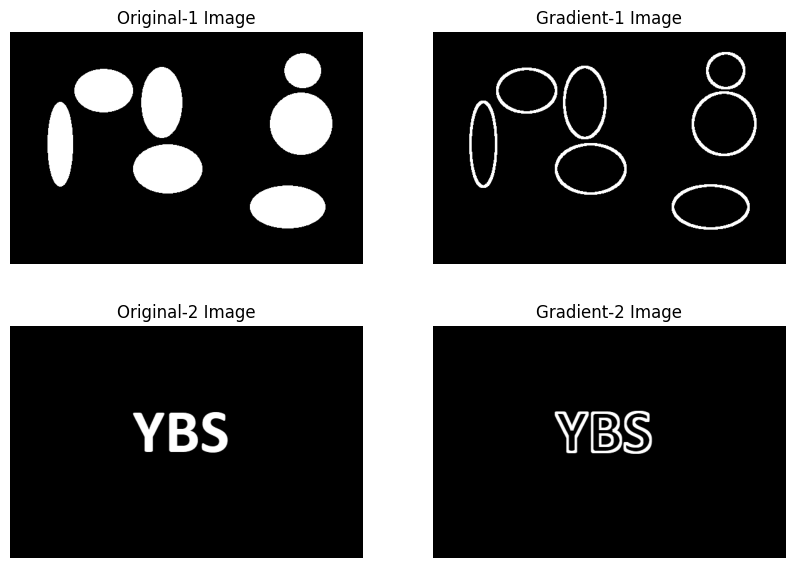

In [28]:
fig = plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.imshow(my_binary_1_img,cmap="gray")
plt.axis("off")
plt.title("Original-1 Image")

plt.subplot(2,2,2)
plt.imshow(my_gradient_1,cmap="gray")
plt.axis("off")
plt.title("Gradient-1 Image")

plt.subplot(2,2,3)
plt.imshow(new_img,cmap="gray")
plt.axis("off")
plt.title("Original-2 Image")

plt.subplot(2,2,4)
plt.imshow(my_gradient_2,cmap="gray")
plt.axis("off")
plt.title("Gradient-2 Image")